##Training Model on complex data
sklearn.datasets.make_moons is a function that generates a synthetic dataset of two interleaving half-moon shapes, useful for testing and visualizing clustering and classification algorithms.

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.datasets import make_moons


##Becoming one  with the data

In [6]:
#Lets create samples
x,y=make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=42)


In [7]:
#Lets check the shape
x.shape,y.shape

((1000, 2), (1000,))

In [8]:
#What is the first 10
x[:10],y[:10]

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604],
        [ 0.66250998, -0.08435588],
        [ 0.27450961, -0.18990367],
        [-0.11555577,  0.53591195],
        [ 1.57236902, -0.33544711],
        [ 0.76398981,  0.96235883]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

/tmp/ipython-input-2692922049.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


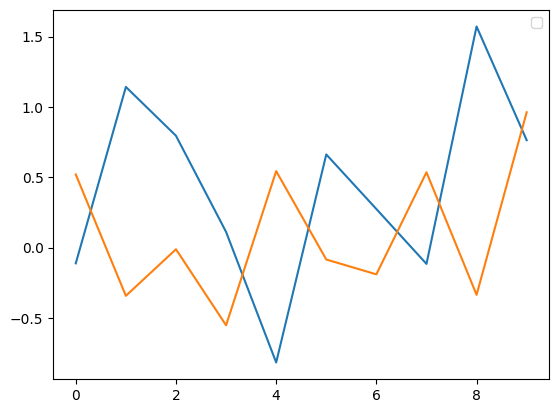

In [9]:
#Visualize the data
import matplotlib.pyplot as plt

plt.plot(x[:10])
plt.legend()

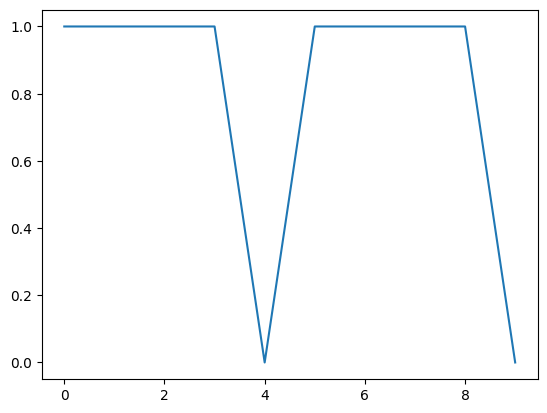

In [10]:
#What about the y
plt.plot(y[:10])

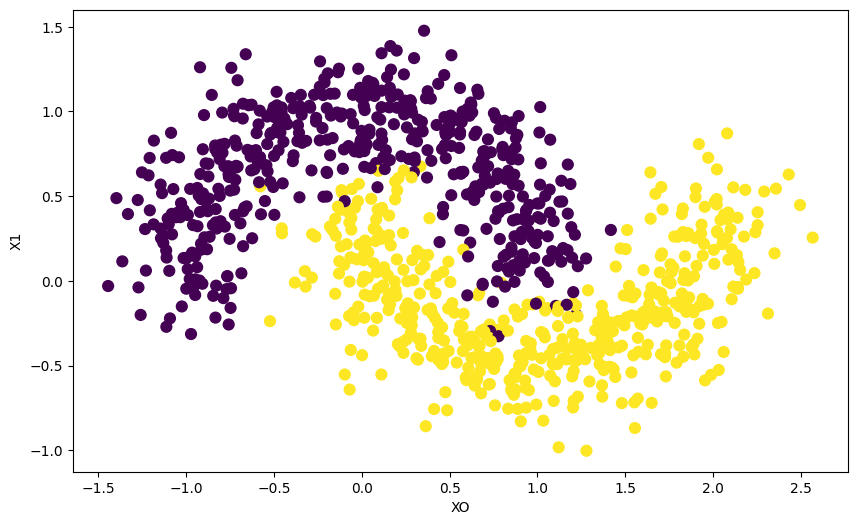

In [11]:
#Lets plot this whole thing and see what we have
fig,ax=plt.subplots(figsize=(10,6 ))
plt.xlabel("XO")
plt.ylabel("X1")
plt.scatter(x[:,0],x[:,1],s=60,c=y)

#Data preprocessing

In [12]:
#split data into train & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [13]:
#Check the data
x_train,len(x_train)

(array([[ 2.06102669, -0.41897921],
        [ 1.80955436, -0.1501022 ],
        [-0.01975859, -0.1510884 ],
        ...,
        [ 0.07811334,  0.2354154 ],
        [ 0.46662857, -0.42858802],
        [-0.05607498,  0.54247277]]),
 750)

In [14]:
len(y_test)

250

So y is in binary form.Great for Neural networks.
What if we normalize the x samle

In [15]:
#Check the shape
x_train.shape,x_test.shape

((750, 2), (250, 2))

In [16]:
#Check the type
x_train[:10],x_test[10]


(array([[ 2.06102669, -0.41897921],
        [ 1.80955436, -0.1501022 ],
        [-0.01975859, -0.1510884 ],
        [ 0.16750934,  1.08585302],
        [ 0.7345332 , -0.35526732],
        [ 1.30385957, -0.39486254],
        [-0.35466053,  0.49369967],
        [-0.01625034,  0.5728759 ],
        [ 0.69127986,  0.56737623],
        [ 0.85328014,  0.718573  ]]),
 array([ 0.42034674, -0.07247682]))

In [17]:
#?Max and min of x
x.min(),x.max()

(np.float64(-1.4440970924275576), np.float64(2.5674271819886263))

In [18]:
#max and min of y
y.min(),y.max(
)

(np.int64(0), np.int64(1))

In [19]:
#set random seed
tf.random.set_seed(42)

#Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#02.Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
#03.Fit the model
history=model.fit(x_train,y_train,epochs=50,verbose=0)



In [20]:
#04.Evaluate the model
model.evaluate(x_test,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9564 - loss: 0.0846


[0.08041039854288101, 0.9639999866485596]

In [21]:
import pandas as pd


Text(0, 0.5, 'Epochs')

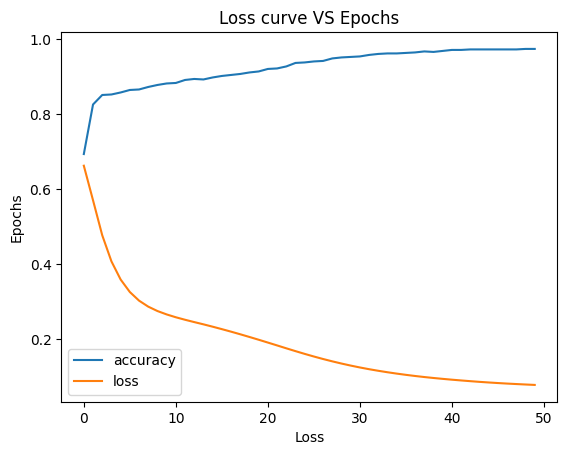

In [22]:
#Plot our models loss curve
pd.DataFrame(history.history).plot()
plt.title("Loss curve VS Epochs")
plt.xlabel("Loss")
plt.ylabel("Epochs")

In [23]:
#Models predictions
y_preds=model.predict(x_test)
y_preds

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[9.88377750e-01],
       [9.89123046e-01],
       [2.25179247e-03],
       [9.06022966e-01],
       [9.99103367e-01],
       [1.47819344e-06],
       [6.26092374e-01],
       [6.71092840e-03],
       [2.03628838e-03],
       [9.92884517e-01],
       [9.41543460e-01],
       [1.14559627e-03],
       [5.51924646e-01],
       [5.31554502e-03],
       [9.99587834e-01],
       [2.66206533e-01],
       [9.99042094e-01],
       [1.23510879e-04],
       [9.14637148e-01],
       [3.94923147e-04],
       [1.47774015e-02],
       [9.52780604e-01],
       [3.76339592e-02],
       [8.94926608e-01],
       [9.97831166e-01],
       [5.45009132e-03],
       [1.16299838e-02],
       [6.48227513e-07],
       [8.85699003e-04],
       [1.73639134e-02],
       [1.55959744e-03],
       [9.99337733e-01],
       [2.36331951e-03],
       [9.97081339e-01],
       [7.83437014e-01],
       [4.45554554e-02],
       [1.60964683e-03],
       [1.35919696e-03],
       [9.99773860e-01],
       [1.65995900e-02],


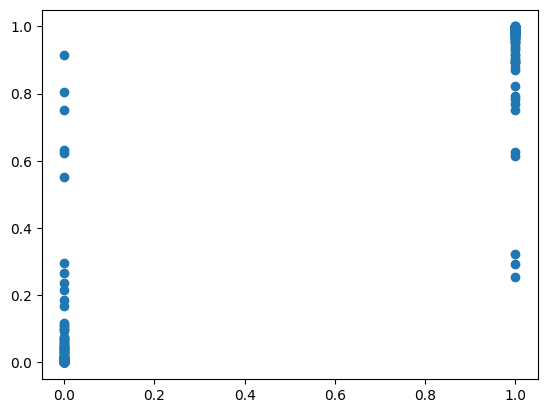

In [24]:
#Plot our predictions against the truth
plt.scatter(y_test,y_preds)

#Prediction 1
Not quite the expected outcome.

1. What is the expected outcome.
2. Are we not supposed to be looking for a decision boundary ?

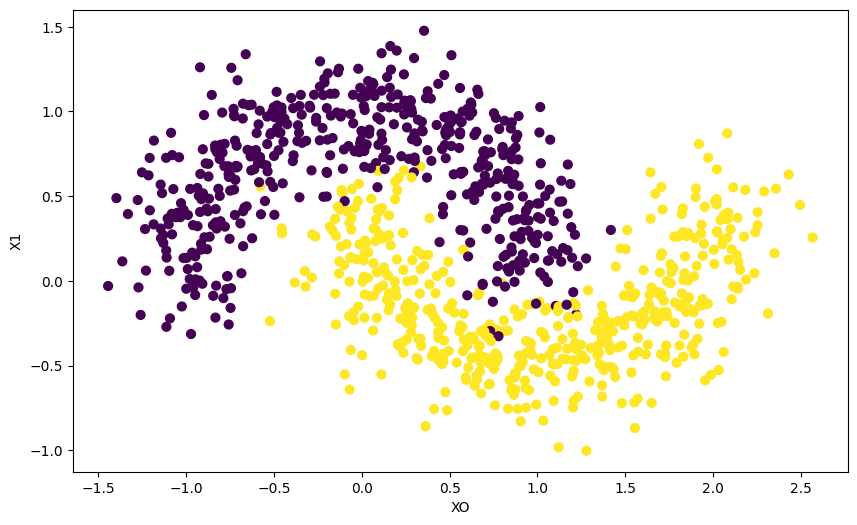

In [25]:
#Check the initial dataset again
fig,ax=plt.subplots(figsize=(10,6))
plt.xlabel("XO")
plt.ylabel("X1")
plt.scatter(x[:,0],x[:,1],s=40,c=y)

In [26]:
 #Define the axis boundary (Lets see)
x_max,x_min=x[:,0].max()+0.1,x[:,0].min()-0.1
y_max,y_min=x[:,1].max()+0.1,x[:,1].min()-0.1
x_max,x_min

(np.float64(2.6674271819886264), np.float64(-1.5440970924275577))

In [27]:
 #Create the meshgrid
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))

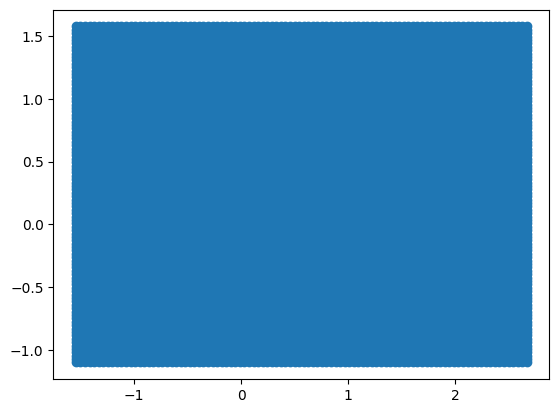

In [28]:
#visualize the grid
plt.scatter(xx,yy)

#Preparing data for prediction
* **BINARY**
1. Takes the raw, continuous predictions from the model.
2. Converts them into binary class labels (0 or 1) by rounding.
3. Restructures the resulting 1D array of labels into the 2D shape required for plotting the decision boundary on a graph.

* **MULTICLASS**
1. Takes the raw prediction probabilities (y_predn),
2. Converts them into single class labels by selecting the label with the highest probability, and then
3. Reshapes the resulting labels into a 2D grid format for visualization purpose


In [41]:
#We should be looking for a decision boundary
def plot_decision_boundary(model,x,y):
  """
  Pass in the model,the features and labels ,predict the boundary ,and plot the preds
  """
  #Define the axis boundary
  x_max,x_min=x[:,0].max()+0.1,x[:,0].min()-0.1
  y_max,y_min=x[:,1].max()+0.1,x[:,1].min()-0.1

  #Create the meshgrid
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
   #Create the x values
  #takes multiple 1D or 2D arrays and puts them side-by-side to form a bigger 2D array.
  x_in=np.c_[xx.ravel(),yy.ravel()]

  #Make predidctions
  y_pred= model.predict(x_in)

  #Check for multiclass  prediction
  if (y_pred[0]>1):
    print("We're doing multiclass predictions")
    #Lets prepare the data for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  #Plot the decision biundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu ,alpha=0.7)
  plt.scatter(x[:,0],x[:,1],s=40 ,c=y ,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


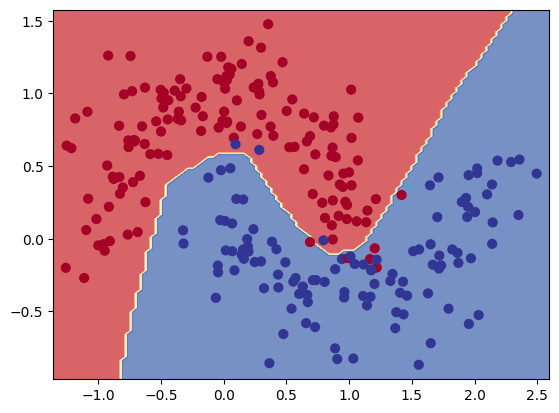

In [30]:
#Check the models prediction
plot_decision_boundary(model=model,x=x_test,y=y_test)

#Improving our models predictions
This is achieved by the following methods:
1. Increasei the no of hidden layers
2. Increasing the number of neurons per hidden  layer
3. Changing  the activation function
4. Training for longer
5. Normalizing the data
6. Tweaking the learning rate


## Tweaking tha learning rate

In [31]:
#set random seed
tf.random.set_seed(42)

#Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#02.Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

#03.Creating a callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

#04.Fit the model
history_lr=model_1.fit(x_train,y_train,epochs=25,verbose=0,callbacks=[lr_scheduler])



In [32]:
#Model evaluate
model_1.evaluate(x_test,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8962 - loss: 0.2467


[0.23549628257751465, 0.9079999923706055]

<Axes: >

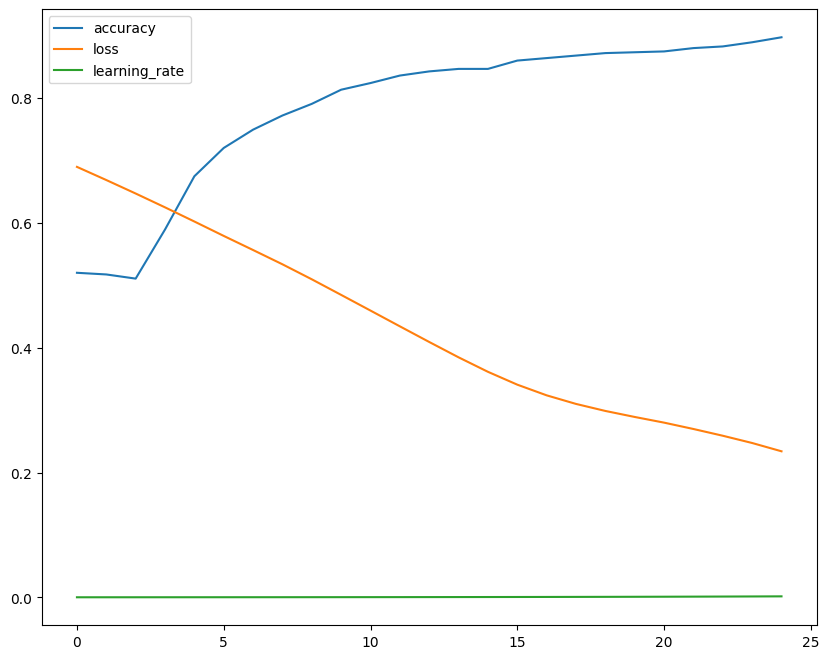

In [33]:
#Lets plot the loss curve
pd.DataFrame(history_lr.history).plot(figsize=(10,8))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


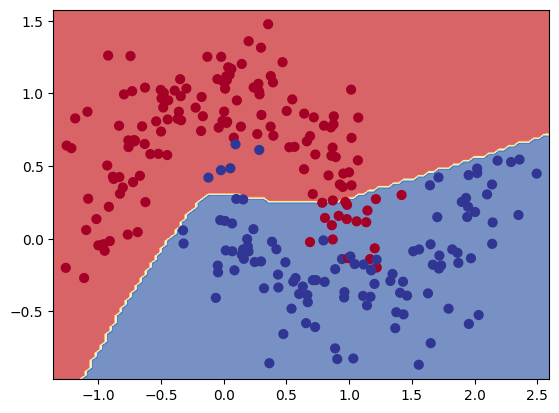

In [34]:
plot_decision_boundary(model_1,x=x_test,y=y_test)

##Observation
The decision boundary cuts the graph of cresent shape plots in a horizontal manner.

##Explanation
The model fails to plot the prediction boundary correctly despite change in lr.This may be due to
1. Simple model
2. Using a non-optimum lr


In [35]:
#Finding the ideal learning rate
lrs=1e-4*10**(tf.range(0,100,4)/25)
lrs,len(lrs)


(<tf.Tensor: shape=(25,), dtype=float64, numpy=
 array([1.00000000e-04, 1.44543977e-04, 2.08929613e-04, 3.01995172e-04,
        4.36515832e-04, 6.30957344e-04, 9.12010839e-04, 1.31825674e-03,
        1.90546072e-03, 2.75422870e-03, 3.98107171e-03, 5.75439937e-03,
        8.31763771e-03, 1.20226443e-02, 1.73780083e-02, 2.51188643e-02,
        3.63078055e-02, 5.24807460e-02, 7.58577575e-02, 1.09647820e-01,
        1.58489319e-01, 2.29086765e-01, 3.31131121e-01, 4.78630092e-01,
        6.91830971e-01])>,
 25)

In [36]:
lrs[:10]

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.0001    , 0.00014454, 0.00020893, 0.000302  , 0.00043652,
       0.00063096, 0.00091201, 0.00131826, 0.00190546, 0.00275423])>

Text(0.5, 1.0, 'Learning rate vs Loss ')

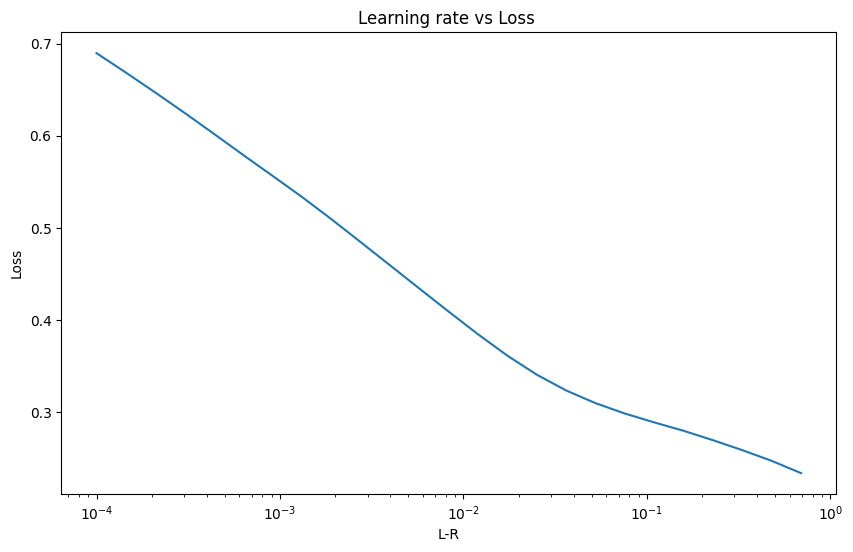

In [37]:
plt.figure(figsize=(10,6))
plt.semilogx(lrs,history_lr.history["loss"])
plt.xlabel("L-R")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss ")

Ideal learning rate lies between 1e-3 & 1e-2

In [48]:
#set random seed
tf.random.set_seed(42)

#Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#02.Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

#03.Fit the model
history_2=model_2.fit(x_train,y_train,epochs=50,verbose=0)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


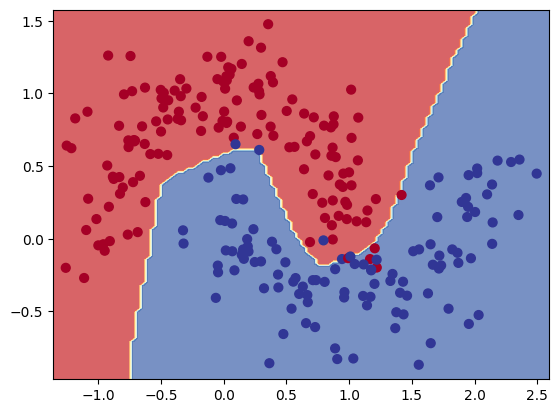

In [57]:
plot_decision_boundary(model=model_2,
                         x=x_test,
                         y=y_test)

In [55]:
#More layers+hiden layers+longer

##set random seed
tf.random.set_seed(42)

#Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#02.Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#03.Fit the model
history_3=model_3.fit(x_train,y_train,epochs=100,verbose=0)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


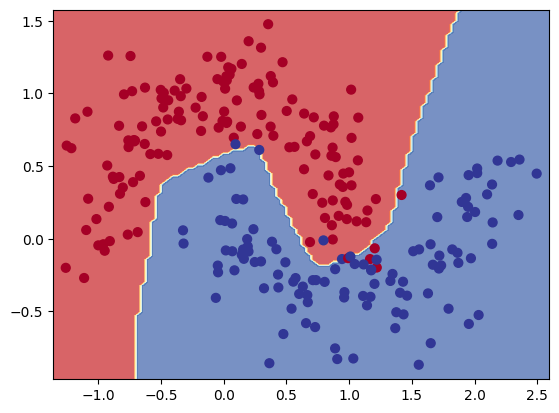

In [56]:
#
plot_decision_boundary(model=model_3,
                         x=x_test,
                         y=y_test)

In [59]:
#Normalized data
x_norm=(x-x.min())/(x.max()-x.min())
x_norm[:10]

array([[0.33215069, 0.48966944],
       [0.64482893, 0.27458883],
       [0.55830525, 0.35713477],
       [0.38786348, 0.22240064],
       [0.15645697, 0.49559544],
       [0.52513881, 0.33895874],
       [0.42841738, 0.3126476 ],
       [0.33118118, 0.49358022],
       [0.75195011, 0.27636627],
       [0.55043588, 0.59988567]])

In [61]:
from sklearn.model_selection import train_test_split
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(x_norm,y)

In [64]:
#Check  the data
x_train_norm[:10],y_train_norm[:10]

(array([[0.08263788, 0.29257986],
        [0.1891128 , 0.37128986],
        [0.53161357, 0.35583633],
        [0.16358963, 0.33477959],
        [0.508575  , 0.21411729],
        [0.61777906, 0.28300355],
        [0.29529832, 0.59983671],
        [0.34600865, 0.49521571],
        [0.59656482, 0.43353371],
        [0.43165711, 0.30662881]]),
 array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1]))

In [79]:
#More layers+hiden layers+longer

##set random seed
tf.random.set_seed(42)

#Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
   # tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#02.Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

#03.Fit the model
history_4=model_4.fit(x_train_norm,y_train_norm,epochs=100,verbose=0)



In [80]:
#04.Evaluate the model
model_4.evaluate(x_test_norm,y_test_norm)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3435 - loss: 2.3925


[2.3661670684814453, 0.36000001430511475]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


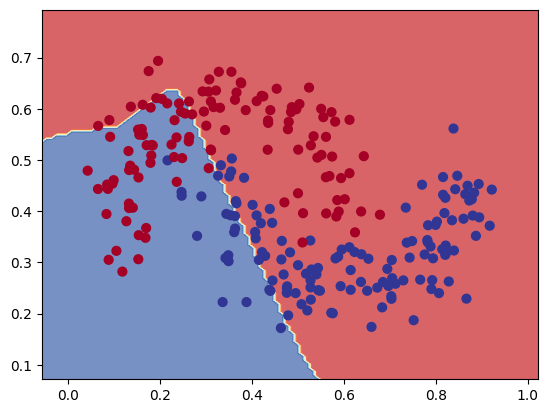

In [85]:
plot_decision_boundary(model=model_4,
                       x=x_test_norm,
                       y=y_test_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


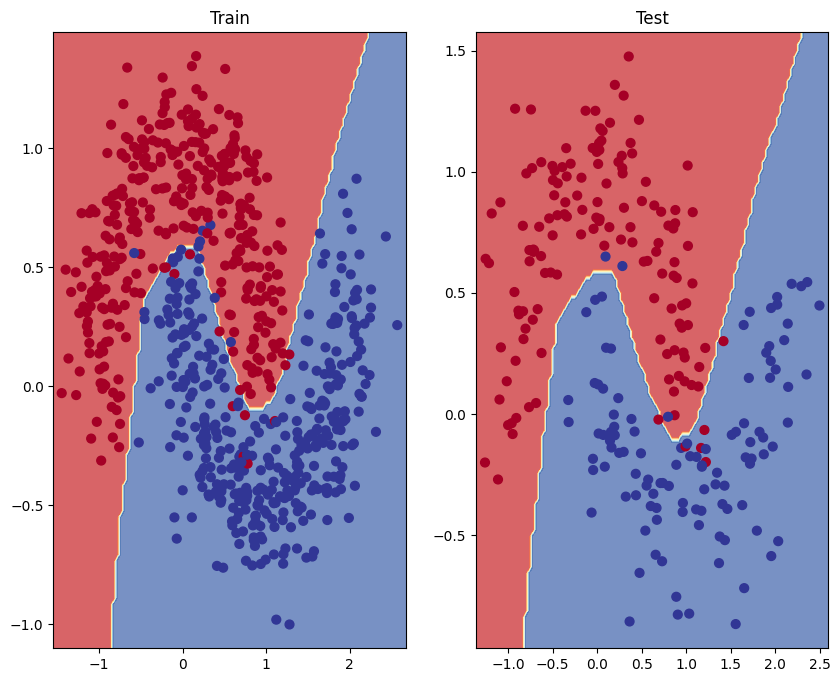

In [91]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,x=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model,
                       x=x_test,
                       y=y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


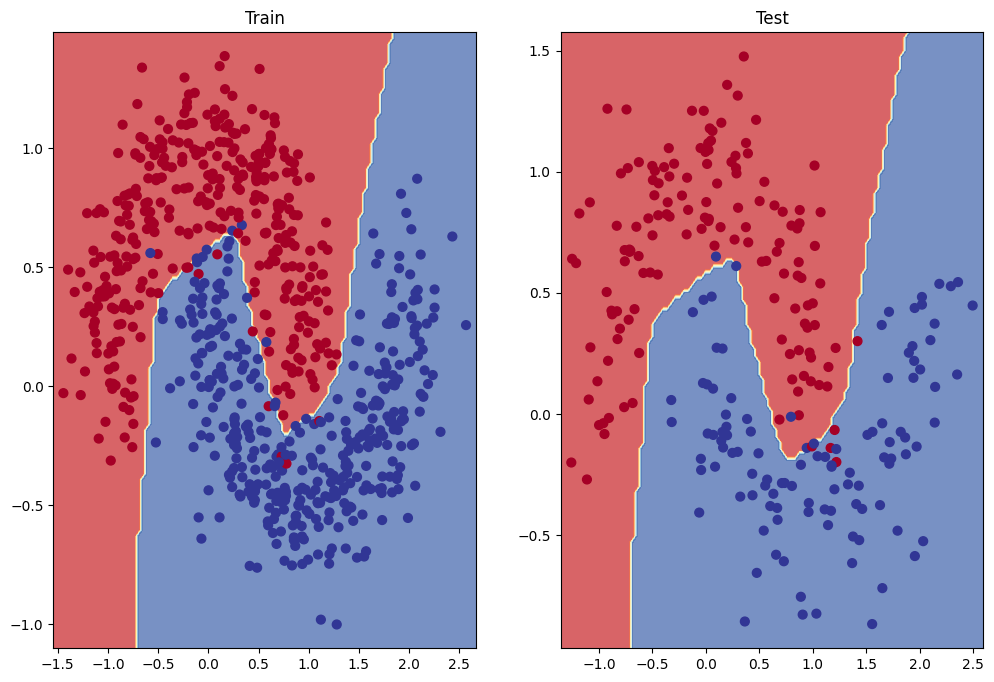

In [89]:
#Model 3 Train and Test results
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,x=x_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_3,
                       x=x_test,
                       y=y_test)
